# ADDDM Case Study Case Study III: Galeries Lafayette

Group 11:

- Yasaman Sadat Mirrezaei Roudaki
- Zeynep Gultug Aydemir


# Part 1: Preparing the Model

## Setting Up

In [ ]:
install.packages('lavaan')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages('ggplot')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘ggplot’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


In [ ]:
install.packages('semPlot')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘htmlTable’, ‘arm’, ‘openxlsx’, ‘Hmisc’, ‘reshape2’, ‘mi’, ‘kutils’, ‘StanHeaders’, ‘rpf’, ‘qgraph’, ‘sem’, ‘lisrelToR’, ‘rockchalk’, ‘corpcor’, ‘OpenMx’




In [ ]:
install.packages('knitr')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘xfun’




In [ ]:
install.packages('dplyr')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages('lavaanPlot')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘igraph’, ‘visNetwork’, ‘DiagrammeR’




In [ ]:
install.packages('lm.beta')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages('rcompanion')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘rootSolve’, ‘e1071’, ‘lmom’, ‘TH.data’, ‘sandwich’, ‘expm’, ‘Exact’, ‘gld’, ‘libcoin’, ‘matrixStats’, ‘modeltools’, ‘multcomp’, ‘zoo’, ‘DescTools’, ‘multcompView’, ‘plyr’, ‘coin’, ‘lmtest’, ‘nortest’




In [ ]:
install.packages('nortest')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages('corrplot')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages('olsrr')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘RcppEigen’, ‘httpuv’, ‘sourcetools’, ‘later’, ‘promises’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘shiny’, ‘car’, ‘goftest’, ‘xplorerr’




In [ ]:
install.packages('pastecs')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages('REdaS')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages('psych')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages('semTools')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(lavaan)
library(semPlot)
library(knitr)
library(dplyr)
library(lavaanPlot)
library(lm.beta)
library(rcompanion)
library(nortest)
library(corrplot)
library(olsrr)
library(pastecs)
library(REdaS)
library(psych)
library(semTools)
library(ggplot2)


Attaching package: ‘ggplot2’


The following objects are masked from ‘package:psych’:

    %+%, alpha




## Exploring the Data

In this analysis, we're exploring and analyzing key factors that influence customer perceptions at Galeries Lafayette. By applying various statistical modeling techniques, such as exploratory and confirmatory factor analysis, this case study aims to uncover underlying dimensions that can help in strategizing better marketing and operational decisions for Galeries Lafayette.

In [ ]:
Mydata=read.csv("Case Study III_Structural Equation Modeling.csv",header=TRUE, na.strings = "999")

At first we take a look at our data obtained from customer surveys, consisting of 22 Likert-scaled question scores reflecting different aspects of customer experience. We apply a brief a cleaning process where missing values identified as '999' were labeled as NA accordingly.

In [ ]:
head(Mydata)

,Im1,Im2,Im3,Im4,Im5,Im6,Im7,Im8,Im9,Im10,⋯,SAT_3,SAT_P1,SAT_P2,SAT_P3,SAT_P4,SAT_P5,SAT_P6,TRU_1,TRU_2,TRU_3
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,7,7,4,4,4,7,NA,NA,6,7,⋯,6,6,7,7,6,6,5,7,7,7
2,4,4,NA,4,3,5,3,5,4,5,⋯,4,NA,NA,5,5,5,NA,4,NA,NA
3,5,5,7,7,7,4,NA,6,6,7,⋯,7,7,7,7,7,7,7,NA,6,6
4,5,5,5,5,5,4,4,4,4,4,⋯,NA,4,4,4,3,3,3,2,5,4
5,4,4,4,3,5,4,4,4,3,6,⋯,4,4,4,4,3,3,3,4,4,4
6,4,4,5,5,NA,4,2,5,3,3,⋯,NA,2,3,3,4,3,4,5,4,6


In [ ]:
colSums(is.na(Mydata))

Im1    Im2    Im3    Im4    Im5    Im6    Im7    Im8    Im9   Im10   Im11 
    14     18     20     10     29      9     26      6     16      6     12 
  Im12   Im13   Im14   Im15   Im16   Im17   Im18   Im19   Im20   Im21   Im22 
    21     15     24     12     24     12     28     12      9      5     17 
 C_CR1  C_CR2  C_CR3  C_CR4 C_REP1 C_REP2 C_REP3 COM_A1 COM_A2 COM_A3 COM_A4 
    20     30      6     10      5     16     18     14     11     18      9 
 SAT_1  SAT_2  SAT_3 SAT_P1 SAT_P2 SAT_P3 SAT_P4 SAT_P5 SAT_P6  TRU_1  TRU_2 
     5     10     40      8     16      6     13      8     13     28     33 
 TRU_3 
    28

Prior to study, there are some preprocessing steps we need to take, to ensure the integrity of our dataset. This involves handling missing values list-wise and excluding the questions that won't contribute to our study in this step yet.

After we exclude the entries that have a missing value in any of the 22 questions, this step leaves us 385 rows from the first 22 questions to work on.

In [ ]:
question_data = na.omit(Mydata[1:22])
head(question_data)

,Im1,Im2,Im3,Im4,Im5,Im6,Im7,Im8,Im9,Im10,⋯,Im13,Im14,Im15,Im16,Im17,Im18,Im19,Im20,Im21,Im22
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
4,5,5,5,5,5,4,4,4,4,4,⋯,6,5,6,5,4,4,5,4,3,2
5,4,4,4,3,5,4,4,4,3,6,⋯,4,6,4,3,3,3,3,3,3,3
7,4,5,6,6,6,7,7,6,7,5,⋯,6,6,4,3,5,4,4,2,4,2
8,7,7,4,4,4,6,7,6,4,6,⋯,6,6,5,4,3,3,6,5,6,4
9,4,4,4,4,5,5,5,5,5,6,⋯,6,6,5,5,5,5,5,6,6,5
12,4,4,7,7,7,7,7,7,6,7,⋯,6,7,6,5,6,6,6,3,5,3


In [ ]:
dim(question_data)

[1] 385  22

## Preliminary Analysis

Preliminary exploration of the dataset is necessary to evaluate the adequacy of the data for factor analysis and to see what kind of a relationship each question shows in between.

Correlation matrix is a great way to identify groups of variables that share a strong linear relationship, which is a good sign for applicability of the factor analysis.
High correlations suggest potential factors that can group these variables together, while low correlations could indicate unique characteristics.

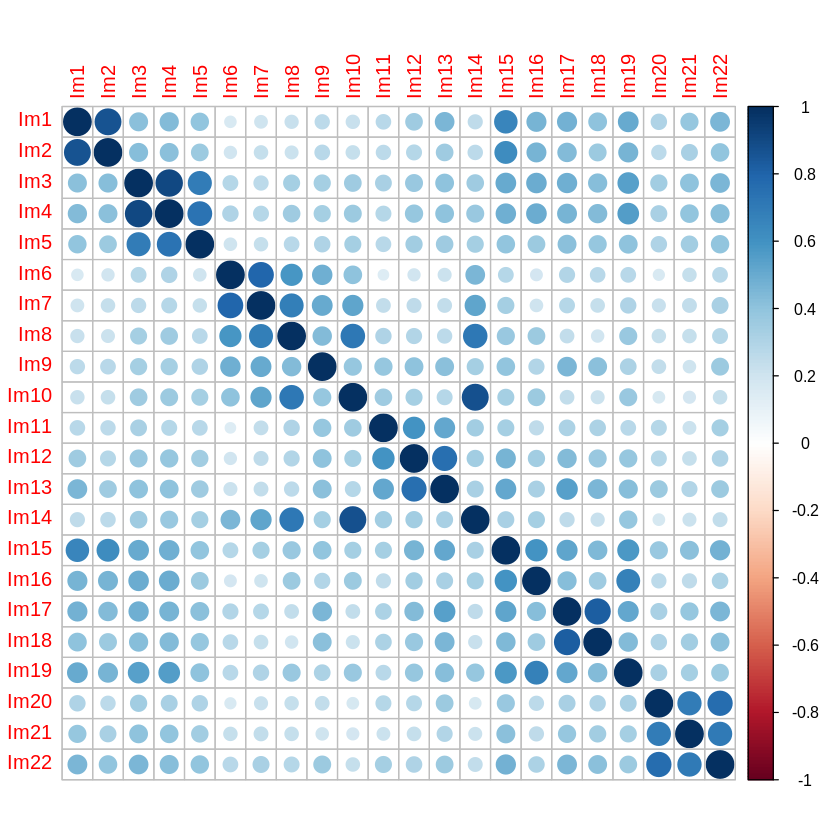

In [ ]:
raqMatrix <- cor(question_data)
corrplot(as.matrix(raqMatrix))

Some pairs of variables, such as Im1 with Im2 and Im4 with Im3, display very strong positive correlations. These correlations may reflect underlying common factors, suggesting they could be grouped together in the factor analysis later on.

Several variables exhibit moderate positive correlations while some pairs show weak and negligible correlations. Variables that doesn't really correlate well with any other items could be capturing unique, independent factors, which are not closely related to the other dimensions of customer experience.

In [ ]:
bart_spher(question_data)

	Bartlett's Test of Sphericity

Call: bart_spher(x = question_data)

     X2 = 6451.238
     df = 231
p-value < 2.22e-16

The Bartlett's Test of Sphericity showed uschi-square value of 6451.238 with 231 degrees of freedom with a p-value is less than 2.22e-16. Showing that data is suitable for the analysis.

In [ ]:
KMOTEST=KMOS(question_data)
print(KMOTEST, sort=T)


Kaiser-Meyer-Olkin Statistics

Call: KMOS(x = question_data)

Measures of Sampling Adequacy (MSA):
      Im2       Im6       Im1      Im20      Im14      Im10       Im7       Im4 
0.8224640 0.8224827 0.8244624 0.8266391 0.8267452 0.8285789 0.8448231 0.8542604 
     Im18       Im3      Im17      Im13      Im12      Im22      Im16      Im11 
0.8550678 0.8640362 0.8644991 0.8722220 0.8789413 0.8793157 0.9092200 0.9113882 
     Im21       Im8       Im9      Im19       Im5      Im15 
0.9149654 0.9300079 0.9380091 0.9400714 0.9546668 0.9647563 

KMO-Criterion: 0.8770975



The KMO is well above 0.5 which indicates the data is well suited for factor analysis. And even though Im2 yielded the lowest MSA, the value is still quite high. We can confirm that the we can move forward with the factor analysis using this data.

## Exploratory Factor Analysis

### Testing the Model on Whole Data

We start by applying a generic FA model on the whole data using varimax rotation.

integer(0)

[1] 8.97758636 2.46726381 1.56195916 1.45683885 1.24785174 1.14733750
 [7] 0.81009930 0.71161301 0.56785521 0.45684420 0.36139965 0.33234747
[13] 0.29499718 0.28351700 0.24936387 0.22811058 0.20225224 0.18624143
[19] 0.15737216 0.11623773 0.10167221 0.08123935

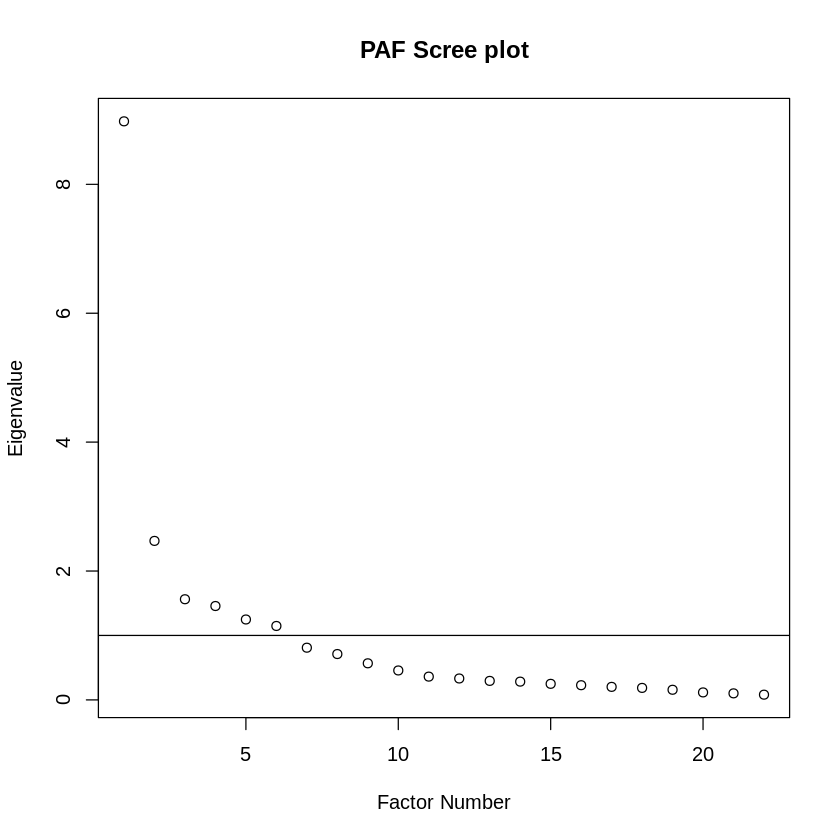

In [ ]:
fa1 <- psych::fa(question_data, rotate="varimax", scores=TRUE)
plot(fa1$e.values,xlab="Factor Number",ylab="Eigenvalue",main="PAF Scree plot")+abline(h=1)
fa1$e.values

Based on Kaiser criterion which suggests keeping the factors with eigenvalues bigger than 1, 6 seems to be the number of factors we can go for. However, it's good practice to test different variations of the model to achieve a better result as this plot alone is not decisive.

In [ ]:
EigenValue=fa1$e.values
Variance=EigenValue/22*100
SumVariance=cumsum(EigenValue/22)
Total_Variance_Explained=cbind(EigenValue=EigenValue[EigenValue>0],Variance=Variance[Variance>0],Total_Variance=SumVariance[Variance>0])
Total_Variance_Explained

EigenValue,Variance,Total_Variance
8.97758636,40.8072107,0.4080721
2.46726381,11.2148355,0.5202205
1.56195916,7.0998144,0.5912186
1.45683885,6.6219948,0.6574386
1.24785174,5.6720533,0.7141591
1.14733750,5.2151705,0.7663108
0.81009930,3.6822696,0.8031335
0.71161301,3.2346046,0.8354795
0.56785521,2.5811600,0.8612911
0.45684420,2.0765645,0.8820568


Even though the first 6 eigenvalues go above 1, we that it only explains 77% of the variance when 7 factors hits the 80% explained variance ratio. And with 8 factors it goes even above 84%. We can test these factors and see how loadings act in each setting.

In [ ]:
fa_6 <- psych::fa(question_data, nfactors=6, rotate="varimax", scores=TRUE)
sort(fa_6$communality)

Im11       Im9      Im16      Im19       Im5      Im18      Im15      Im21 
0.4480767 0.4633992 0.4655515 0.5230514 0.5463696 0.5748726 0.6320372 0.6478302 
     Im17      Im13       Im6      Im12       Im8      Im14       Im2      Im10 
0.6982930 0.6995833 0.7080963 0.7290856 0.7423285 0.7597709 0.7615212 0.7778804 
      Im7      Im20      Im22       Im1       Im3       Im4 
0.7796124 0.7866326 0.7896141 0.8378154 0.8546464 0.9182178

When we look at the communalities, questions 11, 9 and 16 show low values. During our analysis, it's the best if we keep this in mind and watch out for these questions in case they disrupt the analysis.

In [ ]:
print(fa_6$loadings, cutoff=0.3,sort=TRUE)


Loadings:
     MR2    MR5    MR1    MR4    MR3    MR6   
Im6   0.607                              0.563
Im7   0.721                              0.478
Im8   0.815                                   
Im10  0.805                                   
Im14  0.796                                   
Im1          0.855                            
Im2          0.826                            
Im15         0.598                            
Im3                 0.831                     
Im4                 0.875                     
Im5                 0.639                     
Im11                       0.590              
Im12                       0.792              
Im13                       0.732              
Im20                              0.843       
Im21                              0.733       
Im22                              0.787       
Im17         0.351  0.311  0.392         0.538
Im18                       0.353         0.505
Im9   0.354                0.322         0.429
Im

In [ ]:
fa_7 <- psych::fa(question_data, nfactors=7, rotate="varimax", scores=TRUE)
print(fa_7$loadings, cutoff=0.3,sort=TRUE)


Loadings:
     MR5   MR1   MR3   MR2   MR4   MR7   MR6  
Im1  0.860                                    
Im2  0.833                                    
Im15 0.586                                    
Im3        0.828                              
Im4        0.904                              
Im5        0.628                              
Im20             0.846                        
Im21             0.734                        
Im22             0.784                        
Im8                    0.630       0.509      
Im10                   0.874                  
Im14                   0.809                  
Im11                         0.579            
Im12                         0.854            
Im13                         0.715            
Im6                                0.826      
Im7                    0.322       0.836      
Im17                                     0.841
Im18                                     0.715
Im9                          0.332 0.454      
Im

In [ ]:
fa_8 <- psych::fa(question_data, nfactors=8, rotate="varimax", scores=TRUE)
print(fa_8$loadings, cutoff=0.3,sort=TRUE)


Loadings:
     MR1    MR3    MR4    MR7    MR2    MR5    MR6    MR8   
Im3   0.812                                                 
Im4   0.892                                                 
Im5   0.648                                                 
Im20         0.859                                          
Im21         0.733                                          
Im22         0.781                                          
Im11                0.579                                   
Im12                0.860                                   
Im13                0.720                                   
Im6                        0.827                            
Im7                        0.843  0.303                     
Im8                        0.538  0.588                     
Im10                              0.867                     
Im14                              0.833                     
Im1                                      0.884              
Im2          

First look tells us that indeed, 6 factor approach may not be the most suitable solution considering how some questions end up under multiple factors.

Increasing the size of the factor may be one of the solutions, but we also need to consider excluding some questions and see if the loadings improve.

### Testing Different Models

Therefore now we'll run the following function, which takes number of factors, type of rotation and questions to be excluded as a parameter. It does the list-wise cleanup with the excluded questions in case we end up with more rows than 385.

And later the function prints the number of rows and the factor loadings that are over 0.3 so that we see how they're distributed among each factor.

In [ ]:
fa_trials = function(nfactors, rotation, excluded=c()){
  new_data = question_data[, -excluded]
  new_data = na.omit(new_data)
  fa <- psych::fa(new_data, nfactors=nfactors, rotate=rotation, scores=TRUE)
  print(dim(new_data))
  print(fa$loadings, cutoff=0.3,sort=TRUE)
}

For the time being, we will test 7 and 8 factors with varimax rotation and we will interchangeably exclude a number of questions that performed badly in the previous factor analysis and preliminary checks.

Ideally, the model should have the cumulative variance explained above 60-70%, and factor loadings should be at least over 0.3, with each item loading significantly on one factor, providing us clear interpreation. We will be looking for these type of characteristics when picking our final model.

In [ ]:
fa_trials(8,'varimax', c(9,15))

[1] 385  20

Loadings:
     MR1   MR3   MR2   MR4   MR7   MR5   MR6   MR8  
Im3  0.816                                          
Im4  0.895                                          
Im5  0.651                                          
Im20       0.865                                    
Im21       0.728                                    
Im22       0.786                                    
Im8              0.603       0.516                  
Im10             0.892                              
Im14             0.821                              
Im11                   0.564                        
Im12                   0.880                        
Im13                   0.719                        
Im6                          0.820                  
Im7              0.323       0.835                  
Im1                                0.908            
Im2                                0.779            
Im17                                     0.867      
Im18                   

In [ ]:
fa_trials(8,'varimax', c(8,15))

[1] 385  20

Loadings:
     MR1   MR3   MR4   MR2   MR5   MR7   MR6   MR8  
Im3  0.813                                          
Im4  0.892                                          
Im5  0.651                                          
Im20       0.862                                    
Im21       0.732                                    
Im22       0.784                                    
Im11             0.586                              
Im12             0.863                              
Im13             0.718                              
Im6                    0.865                        
Im7                    0.824                        
Im1                          0.907                  
Im2                          0.778                  
Im10                               0.920            
Im14                   0.310       0.761            
Im17                                     0.833      
Im18                                     0.734      
Im16                   

In [ ]:
fa_trials(8,'varimax', c(9,11))

[1] 385  20

Loadings:
     MR4   MR3   MR2   MR1   MR6   MR5   MR8   MR7  
Im3  0.816                                          
Im4  0.895                                          
Im5  0.651                                          
Im20       0.865                                    
Im21       0.731                                    
Im22       0.787                                    
Im8              0.605       0.518                  
Im10             0.889                              
Im14             0.840                              
Im1                    0.869                        
Im2                    0.834                        
Im6                          0.801                  
Im7              0.321       0.849                  
Im12                               0.736            
Im13                               0.824            
Im17                                     0.838      
Im18                                     0.741      
Im16                   

In [ ]:
fa_trials(8,'varimax', c(8,9,11))

[1] 385  19

Loadings:
     MR4   MR3   MR1   MR2   MR6   MR5   MR7   MR8  
Im3  0.816                                          
Im4  0.895                                          
Im5  0.653                                          
Im20       0.864                                    
Im21       0.731                                    
Im22       0.789                                    
Im1              0.876                              
Im2              0.826                              
Im10                   0.934                        
Im14                   0.781                        
Im6                          0.885                  
Im7                    0.316 0.781                  
Im17                               0.876            
Im18                               0.709            
Im12                                     0.741      
Im13                                     0.821      
Im16                                           0.797
Im19 0.306             

In [ ]:
fa_trials(8,'varimax', c(8,9,11,15))

[1] 385  18

Loadings:
     MR1   MR3   MR2   MR5   MR6   MR7   MR4   MR8  
Im3  0.817                                          
Im4  0.894                                          
Im5  0.656                                          
Im20       0.869                                    
Im21       0.731                                    
Im22       0.791                                    
Im10             0.938                              
Im14             0.784                              
Im1                    0.907                        
Im2                    0.780                        
Im6                          0.945                  
Im7              0.341       0.729                  
Im17                               0.878            
Im18                               0.710            
Im12                                     0.665      
Im13                                     0.915      
Im16                                           0.724
Im19                   

In [ ]:
fa_trials(7,'varimax', c(8,11))

[1] 385  20

Loadings:
     MR5   MR4   MR3   MR2   MR7   MR1   MR6  
Im1  0.858                                    
Im2  0.842                                    
Im15 0.585                                    
Im3        0.834                              
Im4        0.906                              
Im5        0.631                              
Im20             0.852                        
Im21             0.735                        
Im22             0.786                        
Im6                    0.841                  
Im7                    0.840                  
Im10                         0.915            
Im14                   0.313 0.774            
Im17                               0.839      
Im18                               0.728      
Im12                                     0.813
Im13                                     0.738
Im9                    0.460                  
Im16 0.456 0.349                              
Im19 0.432 0.377                     

In [ ]:
fa_trials(7,'varimax', c(8,15))

[1] 385  20

Loadings:
     MR1   MR3   MR4   MR5   MR2   MR7   MR6  
Im3  0.839                                    
Im4  0.914                                    
Im5  0.635                                    
Im20       0.848                              
Im21       0.736                              
Im22       0.788                              
Im11             0.587                        
Im12             0.857                        
Im13             0.718                        
Im1                    0.874                  
Im2                    0.827                  
Im6                          0.856            
Im7                          0.827            
Im10                               0.905      
Im14                         0.311 0.770      
Im17                                     0.859
Im18                                     0.709
Im9              0.337       0.455            
Im16 0.374             0.380                  
Im19 0.400             0.372         

In [ ]:
fa_trials(7,'varimax', c(9,11,15))

[1] 385  19

Loadings:
     MR1    MR2    MR3    MR5    MR7    MR6    MR4   
Im3   0.841                                          
Im4   0.914                                          
Im5   0.637                                          
Im8          0.655                0.482              
Im10         0.890                                   
Im14         0.820                                   
Im20                0.858                            
Im21                0.733                            
Im22                0.791                            
Im1                        0.865                     
Im2                        0.839                     
Im6                               0.805              
Im7          0.351                0.833              
Im17                                     0.863       
Im18                                     0.720       
Im12                                            0.659
Im13                                            0.913
Im16 

In [ ]:
fa_trials(7,'varimax', c(8,9,11,15))

[1] 385  18

Loadings:
     MR1   MR3   MR5   MR2   MR6   MR7   MR4  
Im3  0.844                                    
Im4  0.915                                    
Im5  0.639                                    
Im20       0.856                              
Im21       0.734                              
Im22       0.794                              
Im1              0.865                        
Im2              0.839                        
Im10                   0.918                  
Im14                   0.786                  
Im17                         0.873            
Im18                         0.711            
Im6                                0.885      
Im7                    0.322       0.777      
Im12                                     0.662
Im13                                     0.914
Im16 0.376       0.384                        
Im19 0.400       0.370                        

                 MR1   MR3   MR5   MR2   MR6   MR7   MR4
SS loadings    2.714 2.291

Based on the above analysis, 4th trial with 8 factor excluding the questions 8, 9, 11 and 15 appears to be the most effective solution, demonstrating the highest cumulative variance explanation of 80.6%.

This model doesn't not only surpass other models in explaining a significant proportion of the data's structure but also shows a superior factor loading clarity. Each variable exhibits strong and distinct loadings on one factor with minimal cross-loadings, enhancing the interpretability of the results.

As mentioned at the beginning of this trials, clear factor structure and high cumulative variance make this model the most suitable choice for further detailed analysis. Now that we're set with our model selection, now we can move on to our actual analysis.

# Part 2: Answering the Questions

## Question 1: Perceptual Dimensions of Galeries Lafayette

### Labeling the Dimensions on the Final Model

We'll start by interpreting the loading scores from our final model and identify what each factor corresponds to based on the variables.

In [ ]:
variables = read.csv('Variables and Labels_Galeries Lafayette.csv')

In [ ]:
head(variables)

,Variable,Label
,<chr>,<chr>
1,Im1,What do GLB represent from your point of view? Large Assortment
2,Im2,What do GLB represent from your point of view? Assortment Variety
3,Im3,What do GLB represent from your point of view? Artistic Decoration of Sales Area
4,Im4,What do GLB represent from your point of view? Creative Decoration of Sales Area
5,Im5,What do GLB represent from your point of view? Appealing Arrangement of Shop Windows
6,Im6,What do GLB represent from your point of view? France


In [ ]:
image_data_final = question_data[1:22][, -c(8,9,15)]
fa_final <- fa(image_data_final, nfactors=8, rotate="varimax")
print(fa_final$loadings, cutoff=0.3,sort=TRUE)


Loadings:
     MR1   MR3   MR4   MR2   MR5   MR7   MR6   MR8  
Im3  0.814                                          
Im4  0.892                                          
Im5  0.653                                          
Im20       0.863                                    
Im21       0.729                                    
Im22       0.789                                    
Im11             0.566                              
Im12             0.881                              
Im13             0.720                              
Im10                   0.931                        
Im14                   0.774                        
Im1                          0.907                  
Im2                          0.777                  
Im6                                0.962            
Im7                    0.339       0.717            
Im17                                     0.877      
Im18                                     0.704      
Im16                               

In [ ]:
get_top_loadings <- function(df, factor, threshold) {
  df %>%
    filter(!!sym(factor) > threshold) %>%  # Keep only loadings above the threshold, should be arbitrarily picked after reviewing the loading dataframes
    arrange(desc(!!sym(factor))) %>%  # Sort by the factor score descending
    select(name) %>% # Get the question number from name column
    pull()
}

In [ ]:
loadings8 <- tibble(name = rownames(fa_final$loadings), as.data.frame(fa_final$loadings[,c(1:8)]))

In [ ]:
for (i in 1:8) {
  factor_name <- paste0("MR", i)
  # gets the question with the top scores for each factor
  top_loadings <- get_top_loadings(loadings8, factor_name, 0.5)
  # matching the question name from the variables df
  top_labels <- variables %>% filter(Variable %in% top_loadings) %>% select(Variable, Label)

  cat(paste0("Factor ", i, "\n"))

  for (j in 1:nrow(top_labels)) {
    cat(paste0(top_labels$Variable[j], ": ", top_labels$Label[j], "\n"))
  }
  cat("\n")
}

Factor 1
Im3:  What do GLB represent from your point of view?  Artistic Decoration of Sales Area
Im4:  What do GLB represent from your point of view?  Creative Decoration of Sales Area
Im5:  What do GLB represent from your point of view?  Appealing Arrangement of Shop Windows

Factor 2
Im10:  What do GLB represent from your point of view?  Gourmet Food
Im14:  What do GLB represent from your point of view?  Gourmet specialities

Factor 3
Im20:  What do GLB represent from your point of view?  Relaxing Shopping
Im21:  What do GLB represent from your point of view?  A Great Place to Stroll
Im22:  What do GLB represent from your point of view?  Intimate Shop Atmosphere

Factor 4
Im11:  What do GLB represent from your point of view?  High-quality Cosmetics
Im12:  What do GLB represent from your point of view?  Luxury brands
Im13:  What do GLB represent from your point of view?  Up tp date Designer Brands

Factor 5
Im1:  What do GLB represent from your point of view?  Large Assortment
Im2:  W

Based on the grouping we can label the factors as following:

* Factor 1: EnvironmentalAppeal
* Factor 2: GourmetExperience
* Factor 3: RelaxingEnvironment
* Factor 4: QualityProducts
* Factor 5: LargeSelection
* Factor 6: Trendiness
* Factor 7: TrueFrenchExperience
* Factor 8: Professionalism

### CFA

Now using these factors, we can build our initial model and see if the loadings matches were good fit. Based on the result we'll get from the summary, we will decide either to go for another FA model or we can move on to the next step.



In [ ]:
cfa_model <- "
EnvironmentalAppeal =~ Im3 + Im4 + Im5
GourmetExperience =~ Im10 + Im14
RelaxingEnvironment =~ Im20 + Im21 + Im22
QualityProducts =~ Im11 + Im12 + Im13
LargeSelection =~ Im1 + Im2
Trendiness =~ Im17 + Im18
TrueFrenchExperience =~ Im6 + Im7
Professionalism =~ Im16 + Im19
"
fit <- cfa(cfa_model, data=Mydata, missing="ML")

In [ ]:
sum_fit=summary(fit, fit.measures=TRUE,standardized=TRUE)
print(sum_fit)

lavaan 0.6.17 ended normally after 107 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                        85

  Number of observations                           553
  Number of missing patterns                        79

Model Test User Model:
                                                      
  Test statistic                               259.047
  Degrees of freedom                               124
  P-value (Chi-square)                           0.000

Model Test Baseline Model:

  Test statistic                              7474.765
  Degrees of freedom                               171
  P-value                                        0.000

User Model versus Baseline Model:

  Comparative Fit Index (CFI)                    0.982
  Tucker-Lewis Index (TLI)                       0.975
                                                      
  Robust Comparative Fit Index (CF

In [ ]:
# Global Fit Measures
print(sum_fit$fit['chisq']/sum_fit$fit['df'])
print(sum_fit$fit['rmsea'])
print(sum_fit$fit['cfi'])
print(sum_fit$fit['tli'])

   chisq 
2.089093 
     rmsea 
0.04437822 
      cfi 
0.9815099 
      tli 
0.9745015 


We start by checking the Global Fit Measures:

* Chi-squared/df being below 5 shows a good fit.

* RMSEA value of 0.044, being smaller than 0.05, signifies a good fit between the hypothesized model and the observed data.

* Both the Comparative Fit Index (CFI) and the Tucker-Lewis Index (TLI) yielded very good results, with values of 0.982 and 0.975 respectively. These together indicate a very good fit, as values closer to 1.0 are indicative of a better fit and it seems we can accept this model.

Now we continue by Local Fit Measures:

In [ ]:
# Individual Item Reliability: should be above 0.4
lambda = inspect(fit, what="std")$lambda
theta <- inspect(fit, what="std")$theta
psi = inspect(fit, what="std")$psi

lambda2[lambda>0] <- 1
lambda2[lambda==0] <- NA

lambda2^2/(colSums(theta)+lambda2^2)

,EnvironmentalAppeal,GourmetExperience,RelaxingEnvironment,QualityProducts,LargeSelection,Professionalism,Trendiness,TrueFrenchExperience
Im3,0.8909025,NA,NA,NA,NA,NA,NA,NA
Im4,0.9432386,NA,NA,NA,NA,NA,NA,NA
Im5,0.7031431,NA,NA,NA,NA,NA,NA,NA
Im10,NA,0.8712272,NA,NA,NA,NA,NA,NA
Im14,NA,0.9149504,NA,NA,NA,NA,NA,NA
Im20,NA,NA,0.7780181,NA,NA,NA,NA,NA
Im21,NA,NA,0.7213794,NA,NA,NA,NA,NA
Im22,NA,NA,0.8120943,NA,NA,NA,NA,NA
Im11,NA,NA,NA,0.6164094,NA,NA,NA,NA
Im12,NA,NA,NA,0.8066090,NA,NA,NA,NA


In [ ]:
# Composite/Construct Reliability: Should be above 0.6
sum_lambda<-colSums(lambda, na.rm=TRUE)^2

theta_sum=lambda*rowSums(theta)
CR=sum_lambda/(sum_lambda+colSums(sum_theta))
CR

EnvironmentalAppeal    GourmetExperience  RelaxingEnvironment 
           0.9215974            0.9359401            0.8742538 
     QualityProducts       LargeSelection      Professionalism 
           0.8289771            0.9384579            0.7945651 
          Trendiness TrueFrenchExperience 
           0.9102910            0.8799458

In [ ]:
#Average Variance Extracted: Should be above 0.5
ave = colSums(lambda^2)/(colSums(sum_theta)+colSums(lambda^2))
ave

EnvironmentalAppeal    GourmetExperience  RelaxingEnvironment 
           0.7983933            0.8796191            0.6990219 
     QualityProducts       LargeSelection      Professionalism 
           0.6229770            0.8842421            0.6598497 
          Trendiness TrueFrenchExperience 
           0.8358722            0.7867073

In [ ]:
# Fornell-Larcker Criterion: Square root of AVE should be greater than correlations between factors
phi_matrix <- inspect(fit,what="std")$phi
sqrt_ave <- sqrt(ave)

comparison_matrix <- outer(sqrt_ave, sqrt_ave, ">")
diag(comparison_matrix) <- TRUE
fornell_larcker_matrix <- comparison_matrix & (phi_matrix < outer(sqrt_ave, sqrt_ave, ">"))

fornell_larcker_matrix

logical(0)

On the Local Fit Measure results, the model passed all the following tests based on the following criterion:
* Individual Item Reliability: Should be above 0.4
* Composite/Construct Reliability: Should be above 0.6
* Average Variance Extracted: Should be above 0.5
* Fornell-Larcker Criterion: Square root of AVE should be greater than correlations between factors

Now that we completed our fit measures, the model can be considered robust and reliable for interpreting the factors under investigation. The findings enable strong confidence in moving forward with the study and making informed strategic decisions based on the result.

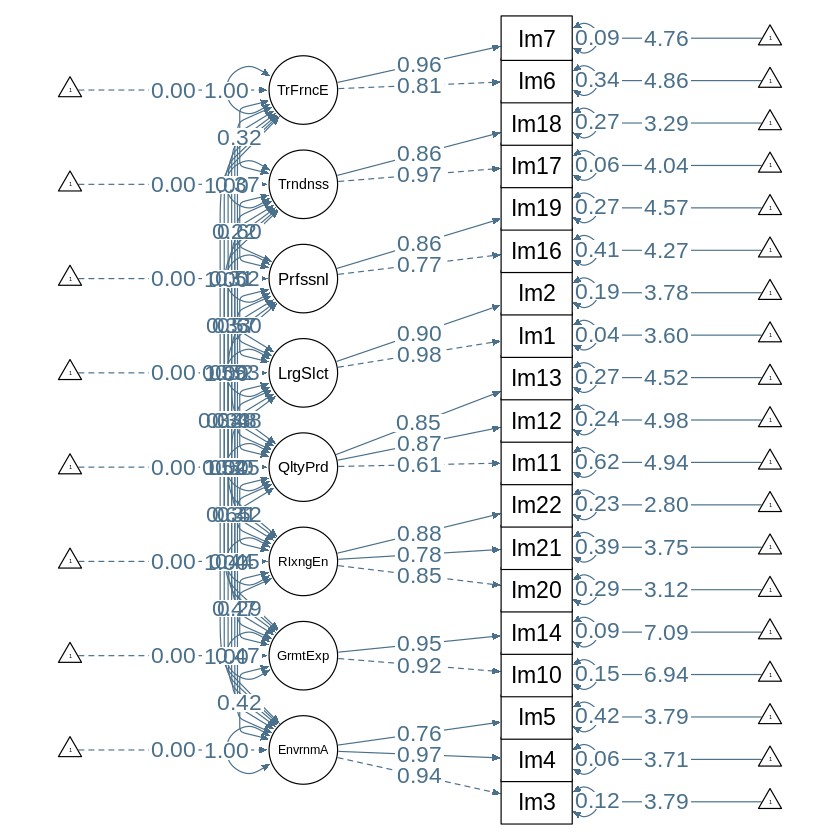

In [ ]:
semPaths(fit, what = "path", whatLabels = "std", style = "mx",
         rotation = 2, layout = "tree3", mar = c(1, 2, 1, 2),
         nCharNodes = 7,shapeMan = "rectangle", sizeMan = 8, sizeMan2 = 5,
         curvePivot=TRUE, edge.label.cex = 1.2, edge.color = "skyblue4")

### Complete Path Analysis

In [ ]:
final_model <- "
# Factors
EnvironmentalAppeal =~ Im3 + Im4 + Im5
GourmetExperience =~ Im10 + Im14
RelaxingEnvironment =~ Im20 + Im21 + Im22
QualityProducts =~ Im11 + Im12 + Im13
LargeSelection =~ Im1 + Im2
Professionalism =~ Im16 + Im19
Trendiness =~ Im17 + Im18
TrueFrenchExperience =~ Im6 + Im7

# Mediators
COM =~ COM_A1 + COM_A2 + COM_A3 + COM_A4
SAT =~ SAT_1 + SAT_2 + SAT_3

# Outcomes
C_REP =~ C_REP1 + C_REP2 + C_REP3
C_CR  =~ C_CR1 + C_CR2 + C_CR3 + C_CR4

# Paths from factors to mediators
COM ~ a*EnvironmentalAppeal + b*GourmetExperience + c*RelaxingEnvironment + d*QualityProducts + e*LargeSelection + f*Professionalism + g*Trendiness + h*TrueFrenchExperience
SAT ~ i*EnvironmentalAppeal + l*GourmetExperience + m*RelaxingEnvironment + n*QualityProducts + o*LargeSelection + p*Professionalism + q*Trendiness + r*TrueFrenchExperience

# Paths from mediators to outcomes
#C_REP ~ u*COM + v*SAT
#C_CR  ~ w*COM + z*SAT

# Paths from factors to outcome
C_REP  ~ aa*EnvironmentalAppeal + bb*GourmetExperience + cc*RelaxingEnvironment + dd*QualityProducts + ee*LargeSelection + ff*Professionalism + gg*Trendiness + hh*TrueFrenchExperience + u*COM + v*SAT
C_CR ~ ii*EnvironmentalAppeal + ll*GourmetExperience + mm*RelaxingEnvironment + nn*QualityProducts + oo*LargeSelection + pp*Professionalism + qq*Trendiness + rr*TrueFrenchExperience + w*COM + z*SAT


# Total effects from mediators to COM
EA_COM := a
GE_COM := b
RE_COM := c
QP_COM := d
LS_COM := e
Pr_COM := f
Tr_COM := g
FE_COM := h

# Total effects from mediators to SAT
EA_SAT := i
GE_SAT := l
RE_SAT := m
QP_SAT := n
LS_SAT := o
Pr_SAT := p
Tr_SAT := q
FE_SAT := r

# Indirect paths from factors to outcomes through COM
#C_REP ~ ua*EnvironmentalAppeal + ub*GourmetExperience + uc*RelaxingEnvironment + ud*QualityProducts + ue*LargeSelection + uf*Professionalism + ug*Trendiness + uh*TrueFrenchExperience
#C_CR ~ wa*EnvironmentalAppeal + wb*GourmetExperience + wc*RelaxingEnvironment + wd*QualityProducts + we*LargeSelection + wf*Professionalism + wg*Trendiness + wh*TrueFrenchExperience

# Indirect effects through COM
# to C_REP
ua := a*u
ub := b*u
uc := c*u
ud := d*u
ue := e*u
uf := f*u
ug := g*u
uh := h*u

# Indirect effects through C_CR
wa := a*w
wb := b*w
wc := c*w
wd := d*w
we := e*w
wf := f*w
wg := g*w
wh := h*w

# Indirect paths from factors to outcomes through SAT
#C_REP ~ vi*EnvironmentalAppeal + vl*GourmetExperience + vm*RelaxingEnvironment + vn*QualityProducts + vo*Luxury + vp*Coolness + vq*Food + vr*Professionalism
#C_CR ~ zi*EnvironmentalAppeal + zl*GourmetExperience + zm*RelaxingEnvironment + zn*QualityProducts + zo*Luxury + zp*Coolness + zq*Food + zr*Professionalism

# Indirect effects through COM
vi := i*v
vl := l*v
vm := m*v
vn := n*v
vo := o*v
vp := p*v
vq := q*v
vr := r*v

# Indirect effects through SAT
zi := i*z
zl := l*z
zm := m*z
zn := n*z
zo := o*z
zp := p*z
zq := q*z
zr := r*z

# Total effects, from factors to outcomes to C_REP
EA_REP := aa + ua + vi
GE_REP := bb + ub + vl
RE_REP := cc + uc + vm
QP_REP := dd + ud + vn
LS_REP := ee + ue + vo
Pr_REP := ff + uf + vp
Tr_REP := gg + ug + vq
FE_REP := hh + uh + vr

# Total effects, from factors to outcomes to C_CR
EA_CR := ii + wa + zi
GE_CR := ll + wb + zl
RE_CR  := mm + wc + zm
QP_CR  := nn + wd + zn
LS_CR  := oo + we + zo
Pr_CR  := pp + wf + zp
Tr_CR  := qq + wg + zq
FE_CR  := rr + wh + zr
"
fit_final = cfa(final_model, data = Mydata, missing = "ML")

In [ ]:
fitsum = summary(fit_final, fit.measures = TRUE, standardized = TRUE)
print(fitsum)

lavaan 0.6.17 ended normally after 151 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                       164

  Number of observations                           553
  Number of missing patterns                       144

Model Test User Model:
                                                      
  Test statistic                               750.161
  Degrees of freedom                               430
  P-value (Chi-square)                           0.000

Model Test Baseline Model:

  Test statistic                             12148.481
  Degrees of freedom                               528
  P-value                                        0.000

User Model versus Baseline Model:

  Comparative Fit Index (CFI)                    0.972
  Tucker-Lewis Index (TLI)                       0.966
                                                      
  Robust Comparative Fit Index (CF

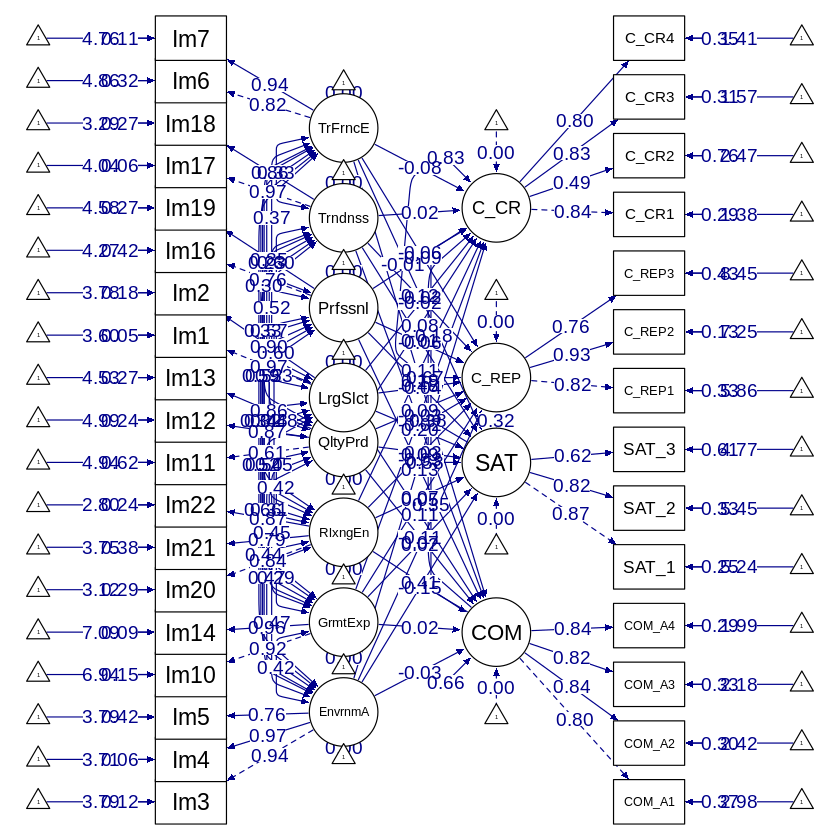

In [ ]:
semPaths(fit_final, what = "path", whatLabels = "std", style = "lisrel", fade = TRUE,
         rotation = 2, layout = "tree", mar = c(1, 1, 1, 1),
         nCharNodes = 7,shapeMan = "rectangle", sizeMan = 8, sizeMan2 = 5,
         curvePivot = TRUE, edge.label.cex = 1, edge.color = "darkblue")

Now that we finished our model, let's perform the fit measures for the last time:

In [ ]:
# Global Fit Measures
print(fitsum$fit['chisq']/sum_fit$fit['df'])
print(fitsum$fit['rmsea'])
print(fitsum$fit['cfi'])
print(fitsum$fit['tli'])

   chisq 
6.049685 
     rmsea 
0.03669335 
      cfi 
0.9724486 
      tli 
0.9661694 


In [ ]:
# Local Fit Measures
# Individual Item Reliability: should be above 0.4
lambda = inspect(fit_final, what="std")$lambda
theta <- inspect(fit_final, what="std")$theta
psi = inspect(fit_final, what="std")$psi

In [ ]:
lambda2[lambda>0] <- 1
lambda2[lambda==0] <- NA
print(lambda2^2/(colSums(theta)+lambda2^2))

        [,1]
  [1,] 0.890
  [2,] 0.944
  [3,] 0.703
  [4,]    NA
  [5,]    NA
  [6,]    NA
  [7,]    NA
  [8,]    NA
  [9,]    NA
 [10,]    NA
 [11,]    NA
 [12,]    NA
 [13,]    NA
 [14,]    NA
 [15,]    NA
 [16,]    NA
 [17,]    NA
 [18,]    NA
 [19,]    NA
 [20,]    NA
 [21,]    NA
 [22,]    NA
 [23,]    NA
 [24,]    NA
 [25,]    NA
 [26,]    NA
 [27,]    NA
 [28,]    NA
 [29,]    NA
 [30,]    NA
 [31,]    NA
 [32,]    NA
 [33,]    NA
 [34,]    NA
 [35,]    NA
 [36,]    NA
 [37,] 0.868
 [38,] 0.919
 [39,]    NA
 [40,]    NA
 [41,]    NA
 [42,]    NA
 [43,]    NA
 [44,]    NA
 [45,]    NA
 [46,]    NA
 [47,]    NA
 [48,]    NA
 [49,]    NA
 [50,]    NA
 [51,]    NA
 [52,]    NA
 [53,]    NA
 [54,]    NA
 [55,]    NA
 [56,]    NA
 [57,]    NA
 [58,]    NA
 [59,]    NA
 [60,]    NA
 [61,]    NA
 [62,]    NA
 [63,]    NA
 [64,]    NA
 [65,]    NA
 [66,]    NA
 [67,]    NA
 [68,]    NA
 [69,]    NA
 [70,]    NA
 [71,]    NA
 [72,] 0.776
 [73,] 0.726
 [74,] 0.807
 [75,]    NA
 [76,]    NA

In [ ]:
# Composite/Construct Reliability: Should be above 0.6
sum_lambda<-colSums(lambda, na.rm=TRUE)^2

theta_sum=lambda*rowSums(theta)
CR=sum_lambda/(sum_lambda+colSums(sum_theta))
CR

Warning message in sum_lambda + colSums(sum_theta):
“longer object length is not a multiple of shorter object length”


EnvironmentalAppeal    GourmetExperience  RelaxingEnvironment 
           0.9215875            0.9359488            0.8742412 
     QualityProducts       LargeSelection      Professionalism 
           0.8287643            0.9384209            0.7935128 
          Trendiness TrueFrenchExperience                  COM 
           0.9102919            0.8797734            0.9471042 
                 SAT                C_REP                 C_CR 
           0.9567716            0.8740354            0.8864461

In [ ]:
#Average Variance Extracted: Should be above 0.5
ave = colSums(lambda^2)/(colSums(sum_theta)+colSums(lambda^2))
ave

Warning message in colSums(sum_theta) + colSums(lambda^2):
“longer object length is not a multiple of shorter object length”


EnvironmentalAppeal    GourmetExperience  RelaxingEnvironment 
           0.7983762            0.8796444            0.6989045 
     QualityProducts       LargeSelection      Professionalism 
           0.6227178            0.8841313            0.6583821 
          Trendiness TrueFrenchExperience                  COM 
           0.8358914            0.7861490            0.8174650 
                 SAT                C_REP                 C_CR 
           0.8825375            0.6997406            0.6696439

In [ ]:
# Fornell-Larcker Criterion: Square root of AVE should be greater than correlations between factors
phi_matrix <- inspect(fit,what="std")$phi
sqrt_ave <- sqrt(ave)

comparison_matrix <- outer(sqrt_ave, sqrt_ave, ">")
diag(comparison_matrix) <- TRUE
fornell_larcker_matrix <- comparison_matrix & (phi_matrix < outer(sqrt_ave, sqrt_ave, ">"))

fornell_larcker_matrix

logical(0)

As we checked earlier, the full model also passed the fit measure criterion as specified on the comment lines above the code.

### Findings and Recommentations

Based on the confirmatory factor analysis (CFA) and path analysis study we completed for Galeries Lafayette, several distinct dimensions through which customers perceive the store have been identified and validated. These dimensions play a critical role in shaping overall customer experience and satisfaction.

* **Environmental Appeal and Relaxing Environment:** These factors show us the importance of the physical and atmospheric elements of the store. Investments in store layout, design, and ambiance can significantly enhance customer satisfaction, therefore marketing strategies should emphasise these aesthetic and comfort aspects in promotions to attract customers looking for more than just shopping.

* **Gourmet Experience and True French Experience:** These dimensions highlight an experiential aspect of shopping at Galeries Lafayette, which can be leveraged in marketing to position the store not just as a shopping destination but as a culinary and cultural experience.

* **Quality Products, Large Selection, and Professionalism:** Emphasising these aspects in marketing communications can help attract customers who value quality, variety, and excellent service. Positioning a strategy that highlights the premium quality of products and the professionalism of service, appealing to a more discerning customer base.

* **Trendiness:** This dimension points to the importance of staying current with trends, which can be particularly appealing to younger demographics. Galeries Lafayette should focus on new arrivals and trend-setting products to attract this segment.


When it comes to the mediators like commitment and satisfaction, we saw that both of them hold a strong relationship between the latent factors and the outcomes as well. It's safe to assume that how customers feel about these factors affect their overall commitment to and satisfaction with the store.

Each factor contributes differently to commitment and satisfaction. For example, luxury might have a smaller effect on commitment compared to satisfaction, reflecting the nuanced influence of luxury perceptions.

Strong paths from satisfaction to both repurchase and cocreation intentions indicate that satisfying customers is crucial for fostering loyalty and encouraging active participation.



From a marketing perspective, we may utilize this model to suggests several strategies to Galeries Lafayette:

* Enhancing Professionalism and Luxury: These are key drivers for both satisfaction and commitment, indicating the importance of maintaining high standards in service and product offerings.
* Leveraging French Influence and Unique Shopping Experience: Being the biggest department store in France, promoting these aspects and offering a unique experience can differentiate the store from competitors.
* Focusing on Food and Assortment: These factors directly impact satisfaction, which in turn influences repurchase intentions, suggesting that improving these areas could lead to increased customer retention.


## Question 2: Mechanism Driving Satisfaction and Affective Commitment

In [ ]:
fitsum$pe[34:41,]

,lhs,op,rhs,label,exo,est,se,z,pvalue,std.lv,std.all,std.nox
,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
34,COM,~,EnvironmentalAppeal,a,0,-0.02399182,0.05448959,-0.4403011,6.597191e-01,-0.02591176,-0.02591176,-0.02591176
35,COM,~,GourmetExperience,b,0,0.02776656,0.08408539,0.3302186,7.412348e-01,0.01965275,0.01965275,0.01965275
36,COM,~,RelaxingEnvironment,c,0,0.37271650,0.05176670,7.1999272,6.024070e-13,0.41106286,0.41106286,0.41106286
37,COM,~,QualityProducts,d,0,-0.18746646,0.09870662,-1.8992288,5.753439e-02,-0.11480953,-0.11480953,-0.11480953
38,COM,~,LargeSelection,e,0,0.10076862,0.05004250,2.0136607,4.404517e-02,0.11427591,0.11427591,0.11427591
39,COM,~,Professionalism,f,0,0.16024234,0.10538808,1.5204978,1.283859e-01,0.12872650,0.12872650,0.12872650
40,COM,~,Trendiness,g,0,-0.01750380,0.05772801,-0.3032116,7.617286e-01,-0.01844330,-0.01844330,-0.01844330
41,COM,~,TrueFrenchExperience,h,0,0.22267774,0.06393231,3.4830233,4.957852e-04,0.19209285,0.19209285,0.19209285


In [ ]:
fitsum$pe[42:49,]

,lhs,op,rhs,label,exo,est,se,z,pvalue,std.lv,std.all,std.nox
,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
42,SAT,~,EnvironmentalAppeal,i,0,-0.108589213,0.04296363,-2.5274683,1.148882e-02,-0.15201981,-0.15201981,-0.15201981
43,SAT,~,GourmetExperience,l,0,0.080558901,0.06512590,1.2369717,2.160976e-01,0.07390856,0.07390856,0.07390856
44,SAT,~,RelaxingEnvironment,m,0,0.052021039,0.03793575,1.3712931,1.702836e-01,0.07436841,0.07436841,0.07436841
45,SAT,~,QualityProducts,n,0,-0.038245437,0.07533563,-0.5076673,6.116867e-01,-0.03036084,-0.03036084,-0.03036084
46,SAT,~,LargeSelection,o,0,0.134293923,0.03962828,3.3888406,7.018880e-04,0.19740838,0.19740838,0.19740838
47,SAT,~,Professionalism,p,0,0.459411496,0.08752430,5.2489595,1.529607e-07,0.47837931,0.47837931,0.47837931
48,SAT,~,Trendiness,q,0,0.007970899,0.04473315,0.1781877,8.585755e-01,0.01088663,0.01088663,0.01088663
49,SAT,~,TrueFrenchExperience,r,0,0.102994342,0.04915130,2.0954551,3.613055e-02,0.11516688,0.11516688,0.11516688


**Factors Influencing Commitment:** Relaxing Environment, Professionalism, True French Experience

**Factors Influencing Satisfaction:** Gourment Experience, Relaxing Environment, Large Selection, Professionalism, True French Experience, Enfironmental Appeal

We see from the significance of the p values that, **Relaxing Environment**, **Professionalism**, and **True French Experience** significantly enhance both commitment and satisfaction. These factors are crucial in creating a positive perception that not only satisfies customers but also enhances their emotional attachment to the brand, fostering commitment.


**Gourmet Experience** significantly contributes to satisfaction but not to commitment, suggesting that while culinary offerings enhance immediate satisfaction, they may not directly contribute to long-term emotional engagement.


**Large Selection** is significantly positive for satisfaction, highlighting its importance in customer satisfaction but not directly influencing commitment.
Environmental Appeal uniquely impacts satisfaction negatively but does not significantly influence commitment, indicating that while some aspects of the environment might detract from immediate satisfaction, they don't necessarily affect deeper emotional bonds.

Given the significant paths from various image perception factors to both commitment and satisfaction, and from these mediators to likely outcomes like repurchase intentions and co-creation intentions (not shown in the data provided but typically included in these models), we can conclude:

* Both commitment and satisfaction likely serve as mediators in the relationship between image perceptions (e.g., Relaxing Environment, Professionalism, True French Experience) and business outcomes. This mediation is particularly strong for factors that influence both satisfaction and commitment.

* Satisfaction likely mediates outcomes related to immediate customer decisions such as repurchase intentions, given its strong association with factors like Gourmet Experience and Large Selection. Commitment, influenced by factors like Professionalism and True French Experience, might mediate longer-term or deeper engagement outcomes, such as loyalty programs or co-creation activities.

The mechanisms driving satisfaction and affective commitment, while overlapping in areas like Relaxing Environment and Professionalism, also have distinct elements that either satisfying immediate needs or developing deeper emotional ties. Both satisfaction and commitment mediate the effects of these perceptions on outcomes, although the specific outcomes each mediator affects could vary based on the nature of the underlying factors. Thus, strategic focus on enhancing both satisfaction and commitment through targeted improvements in the store's environment, assortment, and service quality is essential for driving both immediate and long-term business goals.









## Question 3: What is Driving Repurchase and Co-Creation Intention?

In [ ]:
param_estimates <- parameterestimates(fit_final, boot.ci.type = "bca.simple", standardized = TRUE)

In [ ]:
param_estimates[c(237:244),c(1,5,8)] %>% arrange(desc(est))

lhs,est,pvalue
<chr>,<dbl>,<dbl>
RE_REP,0.12020676,2.083025e-05
Pr_REP,0.09142208,1.180971e-01
GE_REP,0.06012156,2.002934e-01
QP_REP,0.03421627,5.310254e-01
LS_REP,0.03062056,2.670014e-01
FE_REP,0.02949992,4.024835e-01
Tr_REP,-0.01231322,7.020009e-01
EA_REP,-0.01800198,5.543255e-01


Based on the total effects of the image dimensions on repurchase intentions, we achieve the following ranking on the table above. We see that RelaxingEnvironment has the biggest effect while EnvironmentalAppeal shows a negative effect on the Repurchase Intention. To interpret the results briefly:

* **Relaxing Environment** is the strongest driver for repurchase intentions, suggesting that a comfortable and soothing shopping environment is the most crucial factor for convincing customers to return.
* **Professionalism** and **Gourmet Experience** also positively impact repurchase intentions, indicating that professional service and unique experiences especially concerning food are valued highly by customers.
* **Quality Product**, **Large Selection** and **True French Experience** follow these factors next. They don't show a big impact on RI like the others, however we can say that it can still be taken into consideration when making decisions regarding the marketing strategies.
* **Environmental Appeal** surprisingly shows a negative impact on repurchase intentions, which might suggest some elements of the store's environment could be perceived as off-putting or less appealing. There could be some room for improvement in this factor and some areas needing reevaluation or adjustment.

In [ ]:
param_estimates[c(245:252),c(1,5,8)] %>% arrange(desc(est))

lhs,est,pvalue
<chr>,<dbl>,<dbl>
RE_CR,0.337129405,4.605276e-05
QP_CR,0.106699349,5.102014e-01
Tr_CR,0.008285545,9.304631e-01
LS_CR,-0.008211486,9.204119e-01
EA_CR,-0.014487110,8.730379e-01
FE_CR,-0.041777811,6.899526e-01
GE_CR,-0.066878946,6.297832e-01
Pr_CR,-0.231741317,1.723525e-01


* The results show a similar pattern with RI, however now we see an even stronger impact from **Relaxing Environment** with the value of 0.34 and it stands out as a significant positive driver for cocreation intentions, which can be understood as the importance of a pleasant ambiance in encouraging customers to engage creatively with the brand.
* **Quality Products** and Trendiness show a positive but smaller effect, suggesting that high-quality offerings and being up-to-date with fashion can still encourage customers to engage in cocreation activities.
* Interestingly, **Professionalism** and other factors like **Gourmet Experience** and **True French Experience** show negative effects. This could be a very important sign that too formal, too fancy or too traditional approaches may be detering or intimidating customers from feeling comfortable enough to participate in cocreative efforts.

To conclude, our analysis highlights **Relaxing Environment** as the biggest factor influencing both repurchase and cocreation intentions. It is now evident that customers value an environment that allows them to feel relaxed and unhurried, which in turn encourages deeper engagement with the brand, whether through repeat purchases or participation in collaborative initiatives.

**Professionalism** and **Gourmet Experience** show themselves as significant drivers for repurchase intentions, indicating that excellence in service and unique culinary experiences positively influence customer decisions to revisit. These elements could enhance the overall brand perception, fostering loyalty and repeated engagement.

Conversely, factors like **Quality Products** and **Gourmet Experience** show a limited negative impact on cocreation intentions, suggesting that while these elements increase the store's prestige, they may also impose a psychological barrier to customer participation in more collaborative or creative aspects of the brand. This could be due to perceived exclusivity, which may deter customers from feeling they can contribute or engage more deeply.

**True French Experience** and **Trendiness**, while offering a unique positioning for the brand, show various effects on the outcomes, with some negative implications for cocreation. This may be indicating a need of finding a balance between traditional and trendy elements to ensure they are inviting customers rather than alienating.

To improve the customer perception for Galeries Lafayette, the marketing team of this department store could focus on some elements for their next campaign:

* **Enhance and Promote the Relaxing Environment:** Considering its highly strong influence on the ouutcome factors, efforts should be channeled towards maintaining and promoting a comforting and welcoming shopping environment. This could include design improvements, ambient enhancements, and engaging customer management.

* **Reevaluate Luxury and Exclusivity Elements:** To decrease the potential negative impacts on customer engagement, the store might consider strategies to make luxury elements more accessible or relatable, perhaps through targeted marketing campaigns or inclusive brand narratives.

* **Capitalize on Professionalism and Gourmet Offerings:** These factors should continue to be emphasized in marketing and operational strategies, as they significantly enhance customer satisfaction and repurchase intentions.

* **Address Barriers to Cocreation:** Investigate further the reasons why certain factors might stop customers from going for cocreation, and develop initiatives that encourage active customer participation. This could involve workshops, interactive sessions, or social media campaigns that invite customer ideas and feedback in a more approachable and less formal setting.

* **Monitor and Adapt to Customer Feedback:** Continuous monitoring of customer feedback on these dimensions can provide ongoing insights into how well the strategies are working and what adjustments may be necessary to optimize customer satisfaction and engagement.

In conclusion, by strategically leveraging the insights gained from this analysis, Galeries Lafayette can better align its operational and marketing efforts with the factors that most significantly impact customer behavior, enhancing both customer retention and engagement.